# 👾 PixelCNN

In this notebook, we'll walk through the steps required to train your own PixelCNN on the fashion MNIST dataset.

## Table of contents
0. [Parameters](#parameters)
1. [Prepare the Data](#prepare)
2. [Build the autoencoder](#build)
3. [Train the autoencoder](#train)

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

from utils.image import display
from utils.datasets import sample_batches, sample_batch
from utils.losses import root_mean_squared_error

## 0. Parameters <a name="parameters"></a>

In [55]:
IMAGE_SIZE = 32
BATCH_SIZE = 128
N_FILTERS = 128
RESIDUAL_BLOCKS = 5
N_COMPONENTS = 5
EPOCHS = 2000
LOAD_MODEL = False


## 1. Prepare the data <a name="prepare"></a>

In [69]:
# Load the data
(x_train, _), (_, _) = keras.datasets.fashion_mnist.load_data()

In [70]:
# Preprocess the data

def preprocess(imgs):
    imgs = np.pad(imgs , ((0,0), (2,2), (2,2)), constant_values= 0)
    imgs = np.expand_dims(imgs, -1)
    return imgs, imgs#imgs_int

x_train, y_train = preprocess(x_train)

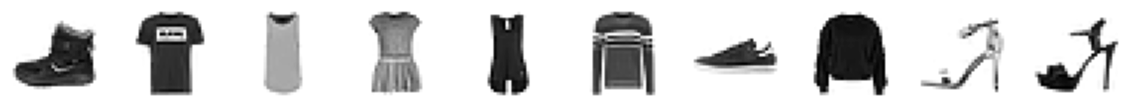

In [71]:
# Show some items of clothing from the training set
display(x_train)

## 2. Build the PixelCNN <a name="build"></a>

In [ ]:
# Define a Pixel CNN network
dist = tfp.distributions.PixelCNN(
    image_shape=(IMAGE_SIZE, IMAGE_SIZE, 1),
    num_resnet=1,
    num_hierarchies=2,
    num_filters=32,
    num_logistic_mix=5,
    dropout_p=.3,
)

# Define the model input
image_input = keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

# Define the log likelihood for the loss fn
log_prob = dist.log_prob(image_input)

# Define the model
model = keras.Model(inputs=image_input, outputs=log_prob)
model.add_loss(-tf.reduce_mean(log_prob))

## 3. Train the PixelCNN <a name="train"></a>

In [66]:
# Compile and train the model
model.compile(
    optimizer=keras.optimizers.Adam(.001),
    )

In [72]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")

class ImageGenerator(keras.callbacks.Callback):
    def __init__(self, num_img):
        self.num_img = num_img
  
    def generate(self):
        return dist.sample(self.num_img).numpy()

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.generate()
        display(generated_images, save_to = "./output/generated_img_%03d.png" % (epoch))
        
img_generator_callback = ImageGenerator(num_img=10)

Layer _PixelCNNNetwork has arguments ['self', 'dropout_p', 'num_resnet', 'num_hierarchies', 'num_filters', 'num_logistic_mix', 'receptive_field_dims', 'resnet_activation', 'use_weight_norm', 'use_data_init']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Layer _PixelCNNNetwork has arguments ['self', 'dropout_p', 'num_resnet', 'num_hierarchies', 'num_filters', 'num_logistic_mix', 'receptive_field_dims', 'resnet_activation', 'use_weight_norm', 'use_data_init']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


Epoch 1/10
  6/469 [..............................] - ETA: 1:24 - loss: 2495.0725WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1095s vs `on_train_batch_end` time: 0.1343s). Check your callbacks.


469/469 [==============================] - ETA: 0s - loss: 1782.7235
Saved to ./output/generated_img_000.png


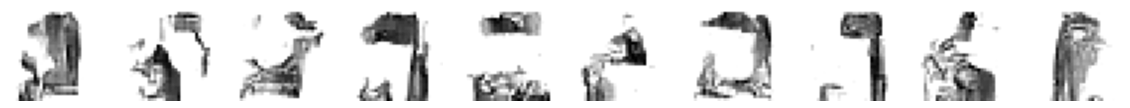

469/469 [==============================] - 156s 331ms/step - loss: 1782.7235
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 1669.5199
Saved to ./output/generated_img_001.png


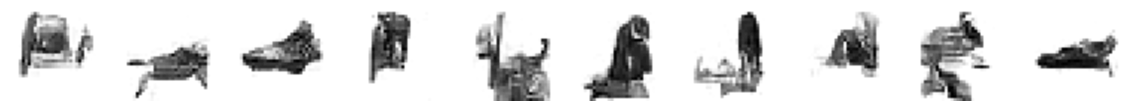

469/469 [==============================] - 155s 330ms/step - loss: 1669.5199
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 1640.0447
Saved to ./output/generated_img_002.png


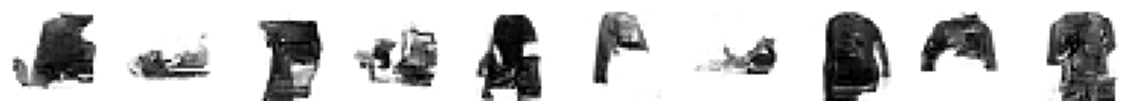

469/469 [==============================] - 154s 329ms/step - loss: 1640.0447
Epoch 4/10
469/469 [==============================] - ETA: 0s - loss: 1620.4418
Saved to ./output/generated_img_003.png


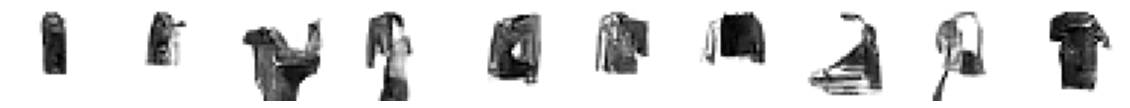

469/469 [==============================] - 155s 330ms/step - loss: 1620.4418
Epoch 5/10
469/469 [==============================] - ETA: 0s - loss: 1605.6405
Saved to ./output/generated_img_004.png


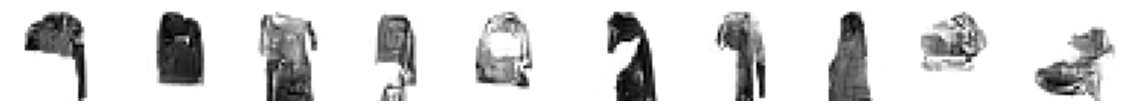

469/469 [==============================] - 153s 327ms/step - loss: 1605.6405
Epoch 6/10
469/469 [==============================] - ETA: 0s - loss: 1599.2760
Saved to ./output/generated_img_005.png


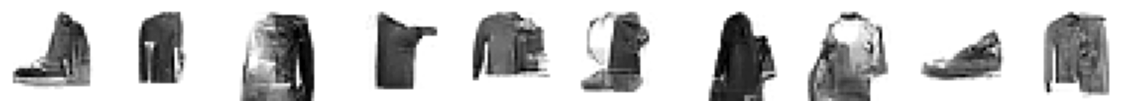

469/469 [==============================] - 154s 329ms/step - loss: 1599.2760
Epoch 7/10
469/469 [==============================] - ETA: 0s - loss: 1590.0751
Saved to ./output/generated_img_006.png


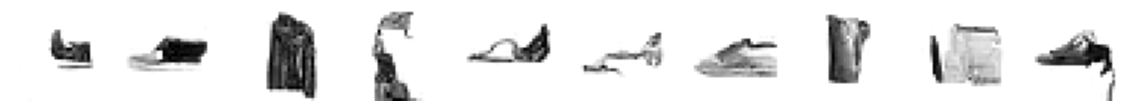

469/469 [==============================] - 153s 327ms/step - loss: 1590.0751
Epoch 8/10
469/469 [==============================] - ETA: 0s - loss: 1585.9290
Saved to ./output/generated_img_007.png


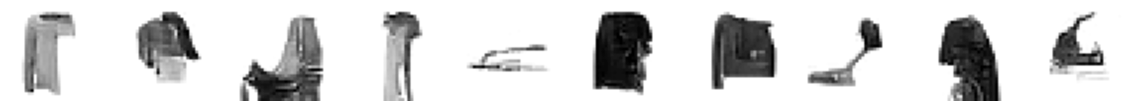

469/469 [==============================] - 160s 341ms/step - loss: 1585.9290
Epoch 9/10
469/469 [==============================] - ETA: 0s - loss: 1581.2548
Saved to ./output/generated_img_008.png


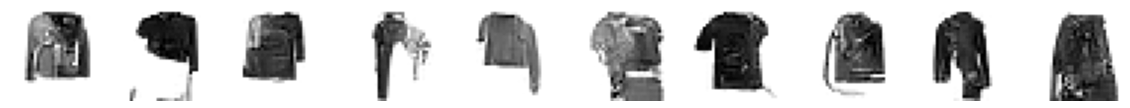

469/469 [==============================] - 167s 356ms/step - loss: 1581.2548
Epoch 10/10
469/469 [==============================] - ETA: 0s - loss: 1577.2113
Saved to ./output/generated_img_009.png


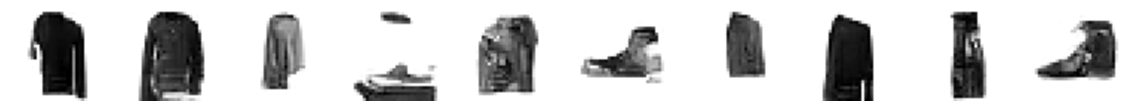

469/469 [==============================] - 165s 352ms/step - loss: 1577.2113


In [73]:
model.fit(x_train
        , batch_size=BATCH_SIZE
        , epochs=10
        # , initial_epoch = 9 
        # , steps_per_epoch = 5
        , verbose=True
        , callbacks=[tensorboard_callback, img_generator_callback]
         )

## 4. Generate images

In [77]:
generated_images = img_generator_callback.generate()

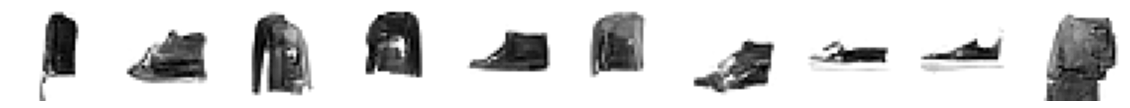

In [79]:
display(generated_images)